In [332]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("foto1A.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("foto1B.jpg", cv2.IMREAD_GRAYSCALE)
import imageio
import imutils

# Função que utiliza o detector SURF

[[ 7.67009536e-01  4.09952690e-02  4.46316114e+02]
 [-1.35480532e-01  9.16000416e-01  7.53882873e+01]
 [-2.10694458e-04 -2.78507085e-05  1.00000000e+00]]


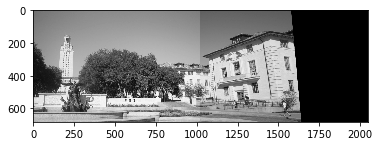

In [330]:
fotoA = img.copy()
fotoB = img2.copy()

FLANN_INDEX_KDTREE = 0
SCH_PARAM_CHECKS = 50
INDEX_PARAM_TREES = 5

GOOD_MATCH_THRESHOLD = 0.4
MIN_MATCH_COUNT = 4

surf = cv2.xfeatures2d.SURF_create()

kp1, desc1 = surf.detectAndCompute(fotoA, None)
kp2, desc2 = surf.detectAndCompute(fotoB, None)

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=INDEX_PARAM_TREES)
sch_params = dict(checks=SCH_PARAM_CHECKS)
flann = cv2.FlannBasedMatcher(index_params, sch_params)

matches = flann.knnMatch(desc1, desc2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < GOOD_MATCH_THRESHOLD * n.distance:
        good_matches.append(m)
    
if len(good_matches) < MIN_MATCH_COUNT:
    raise (Exception('Not enough matches found'))

src_pts = [kp1[m.queryIdx].pt for m in good_matches]
src_pts = np.array(src_pts, dtype=np.float32).reshape((-1, 1, 2))
dst_pts = [kp2[m.trainIdx].pt for m in good_matches]
dst_pts = np.array(dst_pts, dtype=np.float32).reshape((-1, 1, 2))

homo, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)

print(homo)

result = cv2.warpPerspective(fotoA, homo,(fotoA.shape[1] + fotoB.shape[1], fotoA.shape[0]))
result[0:fotoB.shape[0], 0:fotoB.shape[1]] = fotoB

img3 = visualize_homografia(fotoA,fotoB,kp1,kp2,good_matches, homo, mask)

plt.imshow(result, cmap='gray'),plt.show()
imageio.imwrite('foto1/foto1_retas_surf.jpg', img3)
imageio.imwrite('foto1/foto1_juncao_surf.jpg', result)

# Função que utiliza o detector SIFT

[[ 7.59387670e-01  3.20371160e-02  4.48625890e+02]
 [-1.36675710e-01  9.06463015e-01  7.73930002e+01]
 [-2.13362770e-04 -3.77624603e-05  1.00000000e+00]]


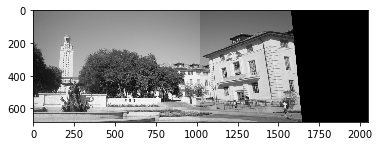

In [326]:
fotoA = img.copy()
fotoB = img2.copy()

FLANN_INDEX_KDTREE = 0
SCH_PARAM_CHECKS = 50
INDEX_PARAM_TREES = 5

GOOD_MATCH_THRESHOLD = 0.4
MIN_MATCH_COUNT = 4

sift = cv2.xfeatures2d.SIFT_create()
#sift = cv2.xfeatures2d.SURF_create()

kp1, desc1 = sift.detectAndCompute(fotoA, None)
kp2, desc2 = sift.detectAndCompute(fotoB, None)

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=INDEX_PARAM_TREES)
sch_params = dict(checks=SCH_PARAM_CHECKS)
flann = cv2.FlannBasedMatcher(index_params, sch_params)

matches = flann.knnMatch(desc1, desc2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < GOOD_MATCH_THRESHOLD * n.distance:
        good_matches.append(m)
    
if len(good_matches) < MIN_MATCH_COUNT:
    raise (Exception('Not enough matches found'))

src_pts = [kp1[m.queryIdx].pt for m in good_matches]
src_pts = np.array(src_pts, dtype=np.float32).reshape((-1, 1, 2))
dst_pts = [kp2[m.trainIdx].pt for m in good_matches]
dst_pts = np.array(dst_pts, dtype=np.float32).reshape((-1, 1, 2))

homo, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)

print (homo)

result = cv2.warpPerspective(fotoA, homo,(fotoA.shape[1] + fotoB.shape[1], fotoA.shape[0]))
result[0:fotoB.shape[0], 0:fotoB.shape[1]] = fotoB

img3 = visualize_homografia(fotoA,fotoB,kp1,kp2,good_matches, homo, mask)

plt.imshow(result, cmap='gray'),plt.show()
imageio.imwrite('foto1/foto1_retas_sift.jpg', img3)
imageio.imwrite('foto1/foto1_juncao_sift.jpg', result)


# Função que utiliza o detector BRIEF

[[ 7.58519584e-01  8.54691495e-02  4.37959105e+02]
 [-1.55776095e-01  9.53332172e-01  7.21015438e+01]
 [-2.45436825e-04  2.74935641e-05  1.00000000e+00]]


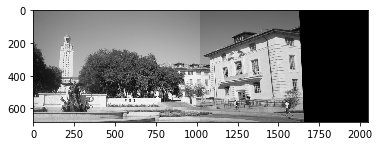

In [328]:
fotoA = img.copy()
fotoB = img2.copy()

GOOD_MATCH_THRESHOLD = 0.4
MIN_MATCH_COUNT = 4

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
star = cv2.xfeatures2d.StarDetector_create()

kp1 = star.detect(fotoA,None)
kp1, desc1 = brief.compute(fotoA, kp1)

kp2 = star.detect(fotoB,None)
kp2, desc2 = brief.compute(fotoB, kp2)

matcher = cv2.DescriptorMatcher_create("BruteForce")
matches = matcher.knnMatch(desc1, desc2, 2)


good_matches = []
for m, n in matches:
    if m.distance < GOOD_MATCH_THRESHOLD * n.distance:
        good_matches.append(m)

if len(good_matches) < MIN_MATCH_COUNT:
    raise (Exception('Not enough matches found'))

src_pts = [kp1[m.queryIdx].pt for m in good_matches]
src_pts = np.array(src_pts, dtype=np.float32).reshape((-1, 1, 2))
dst_pts = [kp2[m.trainIdx].pt for m in good_matches]
dst_pts = np.array(dst_pts, dtype=np.float32).reshape((-1, 1, 2))



homo, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)

print(homo)

result = cv2.warpPerspective(fotoA, homo,(fotoA.shape[1] + fotoB.shape[1], fotoA.shape[0]))
result[0:fotoB.shape[0], 0:fotoB.shape[1]] = fotoB
img3 = visualize_homografia(fotoA,fotoB,kp1,kp2,good_matches, homo, mask)

plt.imshow(result, cmap='gray'),plt.show
imageio.imwrite('foto1/foto1_retas_brief.jpg', img3)
imageio.imwrite('foto1/foto1_juncao_brief.jpg', result)


# Função que utiliza o detector ORB

[[ 7.67665827e-01  5.32997842e-02  4.41198428e+02]
 [-1.40929579e-01  9.22041770e-01  7.57455890e+01]
 [-2.18924837e-04 -1.62979452e-05  1.00000000e+00]]


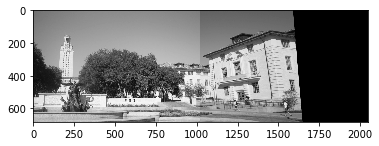

In [329]:
fotoA = img.copy()
fotoB = img2.copy()

GOOD_MATCH_THRESHOLD = 0.4
MIN_MATCH_COUNT = 4

brief = cv2.ORB_create()
star = cv2.xfeatures2d.StarDetector_create()

kp1 = star.detect(fotoA,None)
kp1, desc1 = brief.compute(fotoA, kp1)

kp2 = star.detect(fotoB,None)
kp2, desc2 = brief.compute(fotoB, kp2)

matcher = cv2.DescriptorMatcher_create("BruteForce")
matches = matcher.knnMatch(desc1, desc2, 2)


good_matches = []
for m, n in matches:
    if m.distance < GOOD_MATCH_THRESHOLD * n.distance:
        good_matches.append(m)

if len(good_matches) < MIN_MATCH_COUNT:
    raise (Exception('Not enough matches found'))

src_pts = [kp1[m.queryIdx].pt for m in good_matches]
src_pts = np.array(src_pts, dtype=np.float32).reshape((-1, 1, 2))
dst_pts = [kp2[m.trainIdx].pt for m in good_matches]
dst_pts = np.array(dst_pts, dtype=np.float32).reshape((-1, 1, 2))



homo, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)

print(homo)

result = cv2.warpPerspective(fotoA, homo,(fotoA.shape[1] + fotoB.shape[1], fotoA.shape[0]))
result[0:fotoB.shape[0], 0:fotoB.shape[1]] = fotoB
img3 = visualize_homografia(fotoA,fotoB,kp1,kp2,good_matches, homo, mask)

plt.imshow(result, cmap='gray'),plt.show()
imageio.imwrite('foto1/foto1_retas_orb.jpg', img3)
imageio.imwrite('foto1/foto1_juncao_orb.jpg', result)


# Função para desenhar as retas na imagem

In [187]:
def visualize_homografia(img1, img2, kp1, kp2, matches, homo, mask):
    h, w = img1.shape
    pts = [[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]
    pts = np.array(pts, dtype=np.float32).reshape((-1, 1, 2))
    dst = cv2.perspectiveTransform(pts, homo)

    img2 = cv2.polylines(img2, [np.int32(dst)], True, [255, 0, 0], 3, 8)

    matches_mask = mask.ravel().tolist()
    draw_params = dict(matchesMask=matches_mask,
                       singlePointColor=None,
                       matchColor=(0, 255, 0),
                       flags=2)
    res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **draw_params)
    return res